In [175]:
import seaborn as sns
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import missingno as msno
from numpy import nansum
from numpy import nanmean
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [176]:
#Load all the data to df
level_df = pd.read_csv("level.csv")
precipitations_df = pd.read_csv("precipitations.csv")
dailyData_df = pd.read_csv("daily data.csv")
stations_df = pd.read_csv("stations.csv")

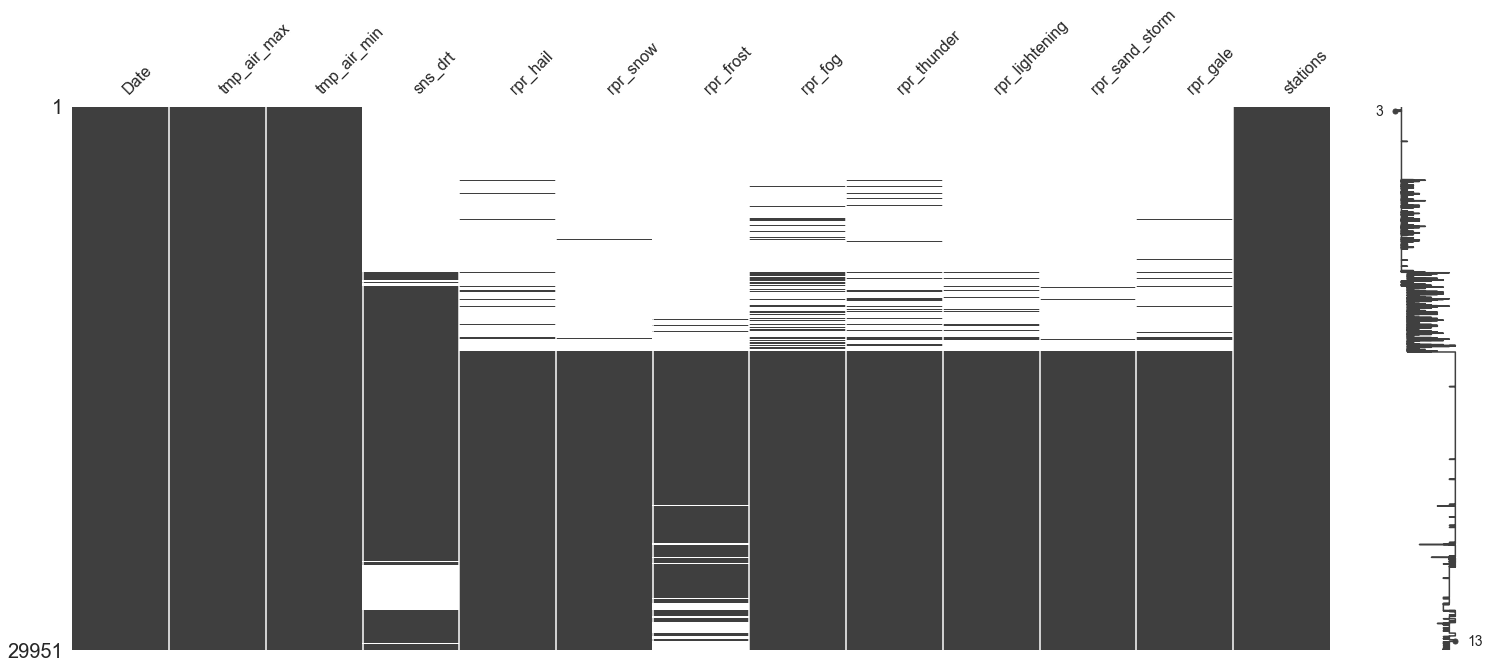

In [189]:
msno.matrix(dailyData_df) 

In [186]:
dailyData_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29951 entries, 0 to 29950
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            29951 non-null  datetime64[ns]
 1   tmp_air_max     29951 non-null  float64       
 2   tmp_air_min     29949 non-null  float64       
 3   sns_drt         18056 non-null  float64       
 4   rpr_hail        16845 non-null  float64       
 5   rpr_snow        16606 non-null  float64       
 6   rpr_frost       14574 non-null  float64       
 7   rpr_fog         19005 non-null  float64       
 8   rpr_thunder     17436 non-null  float64       
 9   rpr_lightening  17087 non-null  float64       
 10  rpr_sand_storm  16569 non-null  float64       
 11  rpr_gale        16703 non-null  float64       
 12  stations        29951 non-null  int64         
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 3.2 MB


In [ ]:
precipitations_df.info()

In [187]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 2234
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stn_num   1308 non-null   int64  
 1   stn_name  1308 non-null   object 
 2   stn_lat   1308 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.9+ KB


In [188]:
level_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9340 entries, 9339 to 0
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            9340 non-null   datetime64[ns]
 1   Kinneret_Level  9340 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 218.9 KB


In [177]:
#Take only the stations with lat >=32 (north)
stations_df = stations_df[(stations_df['stn_lat']>=32)]
stations_df = stations_df[['stn_num','stn_name','stn_lat']]

#Take only the data with the stations with lat >=32
precipitations_df = pd.merge(precipitations_df, stations_df, how='right')
#Data cleaning
precipitations_df = precipitations_df.rename({'time_obs': 'Date','rain_06_next':'rain_mm'}, axis='columns')
precipitations_df= precipitations_df.drop(['Unnamed: 4','rain_code'],axis=1)#,'stn_num'
precipitations_df['Date'] =pd.to_datetime(precipitations_df['Date'])
precipitations_df=precipitations_df.sort_values(by=['Date'])
precipitations_df=precipitations_df.groupby('Date').agg({'rain_mm':'mean'}).reset_index()

#Data cleaning
level_df = level_df.rename({'Survey_Date': 'Date'}, axis='columns')
level_df['Date'] =pd.to_datetime(level_df['Date'])
level_df=level_df.sort_values(by=['Date'])

#Data cleaning
dailyData_df['stations']=1
dailyData_df = pd.merge(dailyData_df, stations_df, how='right')
dailyData_df['tmp_air_max']=dailyData_df['tmp_air_max']/10
dailyData_df['tmp_air_min']=dailyData_df['tmp_air_min']/10
dailyData_df = dailyData_df.rename({'time_obs': 'Date'}, axis='columns')
dailyData_df['Date'] =pd.to_datetime(dailyData_df['Date'])
    #group all the duplicate dates (from stations)
dailyData_df=dailyData_df.groupby('Date').agg({'tmp_air_max':'mean',
                                     'tmp_air_min':'mean',
                                    'sns_drt':'mean',
                                    'rpr_hail':'mean',
                                    'rpr_snow':'mean',
                                    'rpr_frost':'mean',
                                    #'rpr_dew':'mean',
                                     'rpr_fog':'mean',
                                    #'rpr_mist':'mean',
                                    'rpr_thunder':'mean',
                                    'rpr_lightening':'mean',
                                    'rpr_sand_storm':'mean',
                                    'rpr_gale':'mean', 'stations':'count'
                                    }).reset_index()
dailyData_df=dailyData_df.sort_values(by=['Date'])

In [178]:
stations_df.head()

,stn_num,stn_name,stn_lat
0,21,ROSH HANIQRA,33.0806
1,120,NAHARIYYA NORTH,33.0249
2,190,SHAVE ZIYYON,32.9836
3,282,AKKO,32.9318
4,282,AKKO,32.9318


In [179]:
level_df.head()

,Date,Kinneret_Level
9339,1966-01-09,-210.02
9337,1966-01-10,-210.27
9335,1966-01-11,-210.39
9332,1966-01-12,-210.52
9338,1966-09-15,-210.13


In [180]:
precipitations_df.head()

,Date,rain_mm
0,1869-05-06,116.0
1,1869-05-07,51.0
2,1869-09-26,61.0
3,1869-10-05,13.0
4,1869-10-09,5.0


In [181]:
dailyData_df.head()

,Date,tmp_air_max,tmp_air_min,sns_drt,rpr_hail,rpr_snow,rpr_frost,rpr_fog,rpr_thunder,rpr_lightening,rpr_sand_storm,rpr_gale,stations
0,1939-01-01,12.70,8.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1939-01-02,13.30,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1939-01-03,11.80,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1939-01-04,11.35,4.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1939-01-05,11.55,4.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [182]:
#merge all the dfs to main df
main = dailyData_df.copy()
main = pd.merge(main, level_df, how='left', on='Date')
main = pd.merge(main, precipitations_df, how='left', on='Date')
main['Date'] =pd.to_datetime(main['Date'])
main['year'] = pd.DatetimeIndex(main['Date']).year
main['month'] = pd.DatetimeIndex(main['Date']).month
main['day'] = pd.DatetimeIndex(main['Date']).day
main=main.sort_values(by=['Date'])
#fill na data
main['tmp_air_max']=main['tmp_air_max'].fillna(method='ffill')
main['tmp_air_min']=main['tmp_air_min'].fillna(method='ffill')
main['Kinneret_Level']=main['Kinneret_Level'].fillna(method='ffill')
#add other parameters
main['rain_mm']=main['rain_mm'].fillna(0)
main['rain_day']= (main['rain_mm']>0).astype(int)
main['rain_yesterday'] = main['rain_day'].shift()
main['rain_yesterday_mm'] = main['rain_mm'].shift()
main['Change_from_last_day']=main['Kinneret_Level']-main['Kinneret_Level'].shift()
main['KinneretInPrecent']= (main['Kinneret_Level']-main['Kinneret_Level'].min())/(main['Kinneret_Level'].max()-main['Kinneret_Level'].min())
main['KinneretInPrecent']=main['KinneretInPrecent'].fillna(method='ffill')
main=main.dropna(subset=['Kinneret_Level', 'KinneretInPrecent','sns_drt'])
main.to_csv('main.csv', index=False)
main

,Date,tmp_air_max,tmp_air_min,sns_drt,rpr_hail,rpr_snow,rpr_frost,rpr_fog,rpr_thunder,rpr_lightening,...,Kinneret_Level,rain_mm,year,month,day,rain_day,rain_yesterday,rain_yesterday_mm,Change_from_last_day,KinneretInPrecent
9893,1966-02-01,15.626471,7.529412,174.0,NaN,NaN,NaN,NaN,1.0,1.0,...,-210.520,34.867299,1966,2,1,1,1.0,95.105802,0.000,0.652174
9894,1966-02-02,14.976471,6.632353,219.0,NaN,NaN,NaN,1.0,1.0,NaN,...,-210.520,312.530744,1966,2,2,1,1.0,34.867299,0.000,0.652174
9895,1966-02-03,13.161765,8.338235,36.0,1.0,NaN,NaN,1.0,1.0,NaN,...,-210.520,103.611842,1966,2,3,1,1.0,312.530744,0.000,0.652174
9896,1966-02-04,16.079412,6.147059,417.0,NaN,NaN,NaN,1.0,NaN,NaN,...,-210.520,6.461538,1966,2,4,1,1.0,103.611842,0.000,0.652174
9897,1966-02-05,15.761765,6.955882,135.0,NaN,NaN,NaN,1.0,NaN,NaN,...,-210.520,17.954774,1966,2,5,1,1.0,6.461538,0.000,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29946,2020-12-27,18.039535,10.588372,530.0,0.0,0.0,NaN,0.0,0.0,0.0,...,-209.900,0.000000,2020,12,27,0,0.0,0.000000,-0.005,0.745127
29947,2020-12-28,16.835714,9.772093,500.0,0.0,0.0,NaN,0.0,0.0,0.0,...,-209.905,0.000000,2020,12,28,0,0.0,0.000000,-0.005,0.744378
29948,2020-12-29,18.874419,9.986047,530.0,0.0,0.0,NaN,0.0,0.0,0.0,...,-209.910,0.000000,2020,12,29,0,0.0,0.000000,-0.005,0.743628
29949,2020-12-30,19.781395,10.218605,510.0,0.0,0.0,NaN,0.0,0.0,0.0,...,-209.915,0.000000,2020,12,30,0,0.0,0.000000,-0.005,0.742879


In [183]:
#df by year
mainByYear=main.groupby('year').agg({'rain_mm':'sum', 'Kinneret_Level':'last',
                                    'KinneretInPrecent':'last', #get the level in the end of the year
                                    'sns_drt':'mean',
                                    'rpr_hail':'mean',
                                    'rpr_snow':'mean',
                                    'rpr_frost':'mean',
                                    #'rpr_dew':'mean',
                                     'rpr_fog':'mean',
                                    #'rpr_mist':'mean',
                                    'rpr_thunder':'mean',
                                    'rpr_lightening':'mean',
                                    'rpr_sand_storm':'mean',
                                    'rpr_gale':'mean',
                                    'rain_day':'sum',
                                    'tmp_air_max':'mean',
                                    'tmp_air_min':'mean'}).reset_index()
mainByYear=mainByYear.rename({'Kinneret_Level': 'Kinneret_Level_end_of_year', 'KinneretInPrecent': 'KinneretInPrecent_end_of_year'}, axis=1)
#get the last year level (Kinneret)
mainByYear['Kinneret_Level_end_of_last_year'] = mainByYear['Kinneret_Level_end_of_year'].shift()
#get the change in the level (Kinneret)
mainByYear['Change_from_last_year']=mainByYear['Kinneret_Level_end_of_year']-mainByYear['Kinneret_Level_end_of_last_year']
mainByYear.to_csv('mainByYear.csv', index=False)
mainByYear.tail()

,year,rain_mm,Kinneret_Level_end_of_year,KinneretInPrecent_end_of_year,sns_drt,rpr_hail,rpr_snow,rpr_frost,rpr_fog,rpr_thunder,rpr_lightening,rpr_sand_storm,rpr_gale,rain_day,tmp_air_max,tmp_air_min,Kinneret_Level_end_of_last_year,Change_from_last_year
44,2016,5543.606192,-213.605,0.189655,548.832869,0.006983,0.004178,0.0,0.045961,0.044568,0.001397,0.0,0.002715,102,26.616067,15.779561,-213.010,-0.595
45,2017,3222.471773,-214.375,0.074213,548.490251,0.004178,0.004178,NaN,0.036881,0.038997,0.001393,0.0,0.001097,101,26.142645,15.224858,-213.605,-0.770
46,2018,7522.453662,-214.470,0.059970,515.504155,0.002770,0.002770,0.0,0.033241,0.082641,0.012465,0.0,0.002346,144,26.428608,16.287125,-214.375,-0.095
47,2019,8064.460605,-211.550,0.497751,545.916667,0.006944,0.004167,0.0,0.022222,0.080093,0.011111,0.0,0.003580,125,25.919348,15.413668,-214.470,2.920
48,2020,6178.458081,-209.920,0.742129,532.559880,0.008982,0.005988,NaN,0.032934,0.062874,0.011976,0.0,0.003190,109,26.258768,15.983839,-211.550,1.630


In [185]:
#df by month

mainByMonth=main.groupby(['year','month']).agg({'rain_mm':'sum', 'Kinneret_Level':'last',#get the level in the end of the month
                                                'tmp_air_max':'mean','tmp_air_min':'mean' ,'rain_day':'sum',
                                               'sns_drt':'mean'}).reset_index()
mainByMonth['Date']= mainByMonth["year"].astype(str)+'-'+mainByMonth["month"].astype(str)+'-1'
mainByMonth['Date'] =pd.to_datetime(mainByMonth['Date'])

mainByMonth=mainByMonth.rename({'Kinneret_Level': 'Kinneret_Level_end_of_month'}, axis=1)
#get the last month level (Kinneret)
mainByMonth['Kinneret_Level_end_of_last_month'] = mainByMonth['Kinneret_Level_end_of_month'].shift()
#get the change in the level (Kinneret)
mainByMonth['Change_from_last_month']=mainByMonth['Kinneret_Level_end_of_month']-mainByMonth['Kinneret_Level_end_of_last_month']
mainByMonth=mainByMonth.dropna()

mainByMonth=mainByMonth.drop((mainByMonth[mainByMonth['Change_from_last_month']==0].index)& (mainByMonth[mainByMonth['rain_mm']!=0].index))

#Mapping the temperature by range
bins=[0,5,10,15,20,25,30,35,40,45,50]
labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
bins = [mainByMonth['tmp_air_max'].quantile(0),mainByMonth['tmp_air_max'].quantile(0.2),mainByMonth['tmp_air_max'].quantile(0.4),mainByMonth['tmp_air_max'].quantile(0.6),mainByMonth['tmp_air_max'].quantile(0.8),mainByMonth['tmp_air_max'].quantile(1)]
labels = [str(int(mainByMonth['tmp_air_max'].quantile(0)))+'-'+str(int(mainByMonth['tmp_air_max'].quantile(0.2)))
          ,str(int(mainByMonth['tmp_air_max'].quantile(0.2)))+'-'+str(int(mainByMonth['tmp_air_max'].quantile(0.4)))
          ,str(int(mainByMonth['tmp_air_max'].quantile(0.4)))+'-'+str(int(mainByMonth['tmp_air_max'].quantile(0.6)))
          ,str(int(mainByMonth['tmp_air_max'].quantile(0.6)))+'-'+str(int(mainByMonth['tmp_air_max'].quantile(0.8)))
          ,str(int(mainByMonth['tmp_air_max'].quantile(0.8)))+'-'+str(int(mainByMonth['tmp_air_max'].quantile(1)))]
mainByMonth['tmp_air_max_binned']=pd.cut(mainByMonth['tmp_air_max'],bins,labels=labels)
#Mapping the temperature by range
bins = [mainByMonth['tmp_air_min'].quantile(0),mainByMonth['tmp_air_min'].quantile(0.2)
        ,mainByMonth['tmp_air_min'].quantile(0.4),mainByMonth['tmp_air_min'].quantile(0.6),
        mainByMonth['tmp_air_min'].quantile(0.8),mainByMonth['tmp_air_min'].quantile(1)]
labels = [str(int(mainByMonth['tmp_air_min'].quantile(0)))+'-'+str(int(mainByMonth['tmp_air_min'].quantile(0.2)))
          ,str(int(mainByMonth['tmp_air_min'].quantile(0.2)))+'-'+str(int(mainByMonth['tmp_air_min'].quantile(0.4)))
          ,str(int(mainByMonth['tmp_air_min'].quantile(0.4)))+'-'+str(int(mainByMonth['tmp_air_min'].quantile(0.6)))
          ,str(int(mainByMonth['tmp_air_min'].quantile(0.6)))+'-'+str(int(mainByMonth['tmp_air_min'].quantile(0.8)))
          ,str(int(mainByMonth['tmp_air_min'].quantile(0.8)))+'-'+str(int(mainByMonth['tmp_air_min'].quantile(1)))]
mainByMonth['tmp_air_min_binned']=pd.cut(mainByMonth['tmp_air_min'],bins,labels=labels)
mainByMonth.tail()
mainByMonth.to_csv('mainByMonth.csv', index=False)
mainByMonth

,year,month,rain_mm,Kinneret_Level_end_of_month,tmp_air_max,tmp_air_min,rain_day,sns_drt,Date,Kinneret_Level_end_of_last_month,Change_from_last_month,tmp_air_max_binned,tmp_air_min_binned
4,1966,6,0.000000,-210.520,31.866617,18.375909,0,736.200000,1966-06-01,-210.520,0.000,31-34,16-19
6,1966,8,0.000000,-210.520,32.716302,21.048119,0,680.709677,1966-08-01,-210.520,0.000,31-34,19-23
7,1966,9,147.251565,-210.130,30.858892,19.550882,12,578.400000,1966-09-01,-210.520,0.390,28-31,19-23
8,1966,10,641.820627,-210.320,29.395910,16.995677,14,540.677419,1966-10-01,-210.130,-0.190,28-31,16-19
9,1966,11,496.365986,-210.520,27.574701,15.742389,14,472.866667,1966-11-01,-210.320,-0.200,23-28,12-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,2020,8,10.234450,-209.525,33.416222,22.843762,2,686.833333,2020-08-01,-209.370,-0.155,31-34,19-23
577,2020,9,8.964286,-209.745,34.517364,23.186822,2,603.500000,2020-09-01,-209.525,-0.220,31-34,19-23
578,2020,10,0.090909,-209.955,32.605791,19.716357,1,575.000000,2020-10-01,-209.745,-0.210,31-34,19-23
579,2020,11,1529.672024,-209.940,23.586916,14.636897,17,412.954545,2020-11-01,-209.955,0.015,23-28,12-16
